### import Libraries

In [45]:
import FinancialMachineLearning as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('./Data/kospi_sample_2020.csv', index_col = 0)
df = fml.getDataFrame(df)
mad = fml.madOutlier(df.price.values.reshape(-1, 1))
df = df.loc[~mad]
df

288.65
[  6.     6.05   6.   ... 100.7  100.75 100.5 ]
[0.14743169 0.14866029 0.14743169 ... 2.47439526 2.47562386 2.46948087]


,price,buy,sell,volume,v,dv
2020-01-02 10:00:00.000000,294.65,1120.0,0.0,1120.0,1120.0,330008.00
2020-01-02 10:00:00.104156,294.70,3.0,0.0,3.0,3.0,884.10
2020-01-02 10:00:00.208312,294.65,0.0,1.0,1.0,1.0,294.65
2020-01-02 10:00:00.312469,294.60,0.0,1.0,1.0,1.0,294.60
2020-01-02 10:00:00.416625,294.60,0.0,1.0,1.0,1.0,294.60
...,...,...,...,...,...,...
2020-12-30 15:34:59.026355,389.35,0.0,2.0,2.0,2.0,778.70
2020-12-30 15:34:59.348903,389.35,0.0,1.0,1.0,1.0,389.35
2020-12-30 15:34:59.671452,389.35,0.0,1.0,1.0,1.0,389.35
2020-12-30 15:34:59.994000,389.40,6.0,0.0,6.0,6.0,2336.40


In [47]:
dollar_M = 1000000
dollar_df = fml.BarSampling(df, 'dv', dollar_M)
df = dollar_df.groupby(level = 0).first()
df

,price,buy,sell,volume,v,dv
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50
...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90


In [48]:
# Compute RSI
def calculate_rsi(prices, window):
    deltas = prices.diff()
    up = deltas.clip(lower=0)
    down = deltas.clip(upper=0).abs()

    avg_gain = up.rolling(window = window).mean()
    avg_loss = down.rolling(window = window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def get_rsi(data, window = 14):
    df = data.copy(deep=True).reset_index()
    rsi = calculate_rsi(df['price'], window)
    rsi_df = pd.Series(data = rsi.values, index = data.index)
    return rsi_df

In [49]:
# compute bands
window = 14
df['avg'], df['upper'], df['lower'], std0 = fml.getBollingerRange(df['price'], window, width = 0.005)
df

,price,buy,sell,volume,v,dv,avg,upper,lower
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00,295.100000,296.575500,293.624500
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35,295.019643,296.494741,293.544545
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75,294.916638,296.391222,293.442055
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00,294.697398,296.170885,293.223911
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50,294.450224,295.922475,292.977973
...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00,389.546594,391.494327,387.598861
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50,389.547049,391.494784,387.599313
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50,389.540775,391.488479,387.593072
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90,389.528672,391.476315,387.581029


<AxesSubplot:>

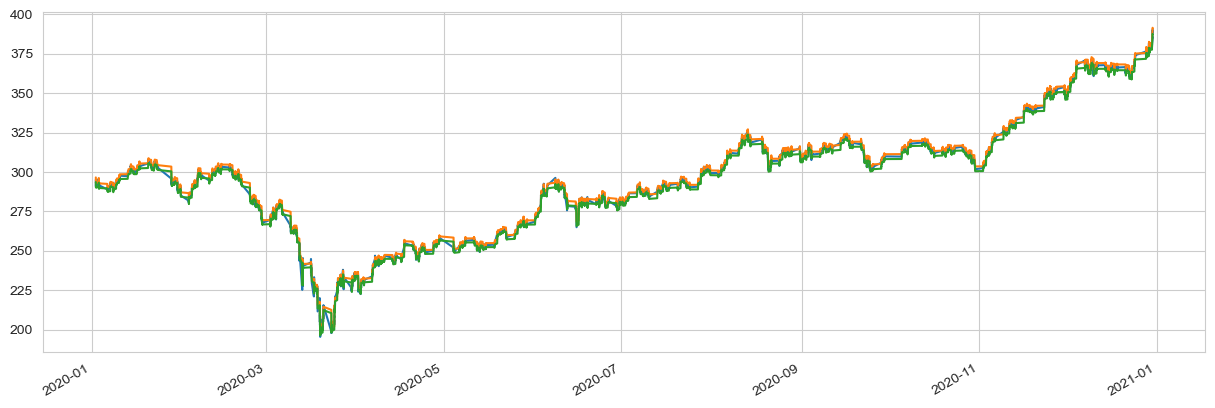

In [50]:
df.price.plot(figsize = (15,5))
df.upper.plot()
df.lower.plot()

fractionally differenciated features

In [51]:
import statsmodels.api as sm

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(df).resample('1H').last().dropna() # daily return
        df2 = fml.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'price'], df2['price'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['price'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d.round(1)}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.2, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.3, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.5, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,0.138046,9.685647e-01,1.0,1732.0,-2.863210,1.000000
0.6,-2.203507,2.049753e-01,1.0,9.0,-3.289881,0.819862
0.7,-3.178047,2.129107e-02,1.0,25.0,-2.986489,0.406898
0.8,-4.767002,6.286744e-05,1.0,72.0,-2.902607,0.524286
0.9,-10.386040,2.078861e-18,1.0,256.0,-2.872897,0.064845
1.0,-28.300219,0.000000e+00,1.0,1731.0,-2.863211,0.054125
1.1,-20.415279,0.000000e+00,1.0,745.0,-2.865427,0.057497
1.2,-22.787922,0.000000e+00,1.0,788.0,-2.865215,0.038205
1.3,-27.965855,0.000000e+00,1.0,952.0,-2.864581,0.020468
1.4,-32.086422,0.000000e+00,1.0,1146.0,-2.864065,0.017785


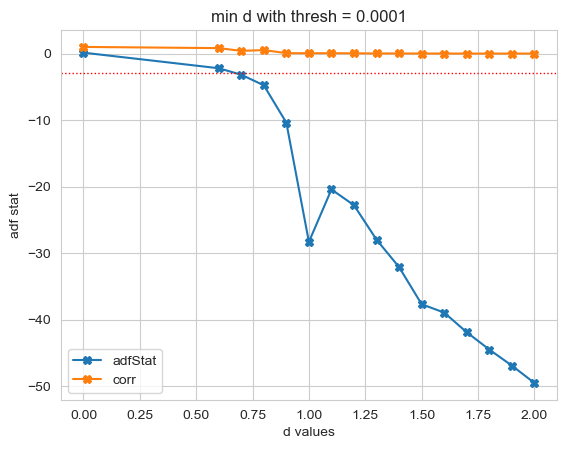

In [52]:
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat')
display(out)

In [53]:
min_ffd = out[out.pVal <= 0.05].iloc[0].name
print("The min. D that makes the fracdiff stationary", min_ffd.round(1))

The min. D that makes the fracdiff stationary 0.7


In [54]:
dfx2 = fml.fracDiff_FFD(df, min_ffd, thres = 1e-5)
dfx2

,price,buy,sell,volume,v,dv,avg,upper,lower
2020-01-09 09:33:05.216870,1.452653,-14.271878,41.533105,27.261227,27.261227,8.022040e+03,1.755004,1.763779,1.746229
2020-01-09 09:40:19.264128,1.749530,-11.360756,-61.658864,-73.019620,-73.019620,-2.138765e+04,1.754284,1.763055,1.745512
2020-01-09 09:44:59.525297,1.816882,-11.605438,-10.247763,-21.853201,-21.853201,-6.382174e+03,1.762639,1.771452,1.753825
2020-01-09 09:50:06.666000,1.404480,40.144861,-7.703151,32.441709,32.441709,9.539509e+03,1.714892,1.723467,1.706318
2020-01-09 09:59:00.000000,1.545416,2.148488,-4.325105,-2.176617,-2.176617,-6.178915e+02,1.692302,1.700763,1.683840
...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,2.176185,-10.880614,84.628108,73.747494,73.747494,2.877185e+04,2.389795,2.401744,2.377846
2020-12-30 15:29:16.758887,1.837930,-3.805661,-0.559160,-4.364821,-4.364821,-1.723414e+03,2.316213,2.327794,2.304632
2020-12-30 15:30:30.202459,2.098589,130.215084,-61.994567,68.220518,68.220518,2.657139e+04,2.287197,2.298633,2.275761
2020-12-30 15:32:38.885000,2.122545,-95.405461,-11.938372,-107.343833,-107.343833,-4.180588e+04,2.265243,2.276569,2.253917


In [55]:
df['fracdiff'] = dfx2['price']
df

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00,295.100000,296.575500,293.624500,NaN
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35,295.019643,296.494741,293.544545,NaN
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75,294.916638,296.391222,293.442055,NaN
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00,294.697398,296.170885,293.223911,NaN
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50,294.450224,295.922475,292.977973,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00,389.546594,391.494327,387.598861,2.176185
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50,389.547049,391.494784,387.599313,1.837930
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50,389.540775,391.488479,387.593072,2.098589
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90,389.528672,391.476315,387.581029,2.122545


Volatility

In [61]:
dailyVol = fml.getDailyVolatility(df.price, span = 50)
dailyVol

2020-01-03 10:03:07.296568         NaN
2020-01-03 10:10:11.248875    0.003608
2020-01-03 10:17:40.174554    0.004120
2020-01-03 10:28:29.997000    0.004856
2020-01-03 10:37:52.935882    0.004945
                                ...   
2020-12-30 15:27:20.310469    0.004774
2020-12-30 15:29:16.758887    0.004679
2020-12-30 15:30:30.202459    0.004596
2020-12-30 15:32:38.885000    0.004518
2020-12-30 15:45:00.000000    0.004455
Name: dailyVol, Length: 20627, dtype: float64

<AxesSubplot:>

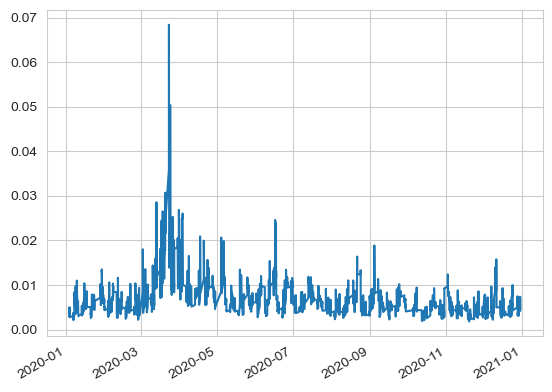

In [62]:
dailyVol.plot()

In [63]:
df['daily_vol'] = dailyVol

In [64]:
df

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,daily_vol
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00,295.100000,296.575500,293.624500,NaN,NaN
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35,295.019643,296.494741,293.544545,NaN,NaN
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75,294.916638,296.391222,293.442055,NaN,NaN
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00,294.697398,296.170885,293.223911,NaN,NaN
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50,294.450224,295.922475,292.977973,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00,389.546594,391.494327,387.598861,2.176185,0.004774
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50,389.547049,391.494784,387.599313,1.837930,0.004679
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50,389.540775,391.488479,387.593072,2.098589,0.004596
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90,389.528672,391.476315,387.581029,2.122545,0.004518


Vertical Barrier

In [66]:
tEvents = fml.getTEvents(df['price'], h = dailyVol.mean() * 0.1)
tEvents

DatetimeIndex(['2020-01-02 10:01:59.751600', '2020-01-02 10:04:31.548569',
               '2020-01-02 10:06:39.158645', '2020-01-02 10:07:58.837489',
               '2020-01-02 10:10:29.738405', '2020-01-02 10:14:05.624438',
               '2020-01-02 10:16:49.086000', '2020-01-02 10:18:14.487715',
               '2020-01-02 10:20:14.183885', '2020-01-02 10:22:06.532298',
               ...
               '2020-12-30 15:13:36.963128', '2020-12-30 15:16:12.093652',
               '2020-12-30 15:18:31.761529', '2020-12-30 15:20:45.952851',
               '2020-12-30 15:23:41.796768', '2020-12-30 15:27:20.310469',
               '2020-12-30 15:29:16.758887', '2020-12-30 15:30:30.202459',
               '2020-12-30 15:32:38.885000',        '2020-12-30 15:45:00'],
              dtype='datetime64[ns]', length=15707, freq=None)

In [67]:
vertical_barriers = fml.addVerticalBarrier(tEvents, df['price'], numDays = 5)
vertical_barriers

2020-01-02 10:01:59.751600   2020-01-07 10:03:43.666519
2020-01-02 10:04:31.548569   2020-01-07 10:06:29.831271
2020-01-02 10:06:39.158645   2020-01-07 10:12:45.877765
2020-01-02 10:07:58.837489   2020-01-07 10:12:45.877765
2020-01-02 10:10:29.738405   2020-01-07 10:12:45.877765
                                        ...            
2020-12-24 15:15:43.182495   2020-12-29 15:16:39.836016
2020-12-24 15:20:21.920885   2020-12-29 15:23:17.559220
2020-12-24 15:30:16.429126   2020-12-29 15:31:28.568571
2020-12-24 15:33:36.424929   2020-12-29 15:45:00.000000
2020-12-24 15:45:00.000000   2020-12-29 15:45:00.000000
Length: 15434, dtype: datetime64[ns]

In [68]:
import platform
from multiprocessing import cpu_count

if platform.system() == 'Windows':
    cpus = 1
else:
    cpus = cpu_count() - 1
ptsl = [1, 1]
target = dailyVol * 2
minRet = 0.001
cpus = cpu_count() - 1
events = fml.getEvents(df['price'], tEvents, ptsl, target, minRet, cpus, t1 = vertical_barriers)

KeyError: "[Timestamp('2020-01-02 10:16:49.086000'), Timestamp('2020-01-02 11:00:38.178000'), Timestamp('2020-01-02 11:35:09.696000'), Timestamp('2020-01-02 15:45:00')] not in index"

RSI

In [11]:
rsi_windows = [5, 13, 34, 55]
for w in rsi_windows:
    rsi = get_rsi(df, window = w).squeeze()
    df[f'rsi_{w}'] = rsi

In [12]:
df

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,rsi_5,rsi_13,rsi_34,rsi_55
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00,295.100000,296.575500,293.624500,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35,295.019643,296.494741,293.544545,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75,294.916638,296.391222,293.442055,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00,294.697398,296.170885,293.223911,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50,294.450224,295.922475,292.977973,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00,389.546594,391.494327,387.598861,2.176185,54.545455,70.491803,61.403509,64.983165
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50,389.547049,391.494784,387.599313,1.837930,44.444444,67.187500,56.395349,62.333333
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50,389.540775,391.488479,387.593072,2.098589,40.740741,64.516129,55.029586,64.705882
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90,389.528672,391.476315,387.581029,2.122545,40.740741,58.181818,52.760736,62.681159


In [13]:
# Compute sides
df['side'] = np.nan


long_signals = (df['price'] <= df['lower'])#& (data['close'].shift(1) >= data['lower'].shift(1))
short_signals = (df['price'] >= df['upper'])#& (data['close'].shift(1) <= data['upper'].shift(1))

df.loc[long_signals, 'side'] = 1
df.loc[short_signals, 'side'] = -1

print(df.side.value_counts())
# Remove Look ahead biase by lagging the signal
df['side'] = df['side'].shift(1)

 1.0    795
-1.0    790
Name: side, dtype: int64


In [14]:
df

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,rsi_5,rsi_13,rsi_34,rsi_55,side
2020-01-02 10:00:48.016031,295.10,60.0,0.0,60.0,60.0,17706.00,295.100000,296.575500,293.624500,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:01:59.751600,294.95,0.0,33.0,33.0,33.0,9733.35,295.019643,296.494741,293.544545,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:04:31.548569,294.75,0.0,113.0,113.0,113.0,33306.75,294.916638,296.391222,293.442055,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:06:39.158645,294.20,90.0,0.0,90.0,90.0,26478.00,294.697398,296.170885,293.223911,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 10:07:58.837489,293.75,0.0,22.0,22.0,22.0,6462.50,294.450224,295.922475,292.977973,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 15:27:20.310469,390.00,0.0,94.0,94.0,94.0,36660.00,389.546594,391.494327,387.598861,2.176185,54.545455,70.491803,61.403509,64.983165,NaN
2020-12-30 15:29:16.758887,389.55,0.0,70.0,70.0,70.0,27268.50,389.547049,391.494784,387.599313,1.837930,44.444444,67.187500,56.395349,62.333333,NaN
2020-12-30 15:30:30.202459,389.50,133.0,0.0,133.0,133.0,51803.50,389.540775,391.488479,387.593072,2.098589,40.740741,64.516129,55.029586,64.705882,NaN
2020-12-30 15:32:38.885000,389.45,0.0,2.0,2.0,2.0,778.90,389.528672,391.476315,387.581029,2.122545,40.740741,58.181818,52.760736,62.681159,NaN


In [15]:
from copy import deepcopy
# Save the raw data
raw_data = deepcopy(df)

# Drop the NaN values from our data set
raw_data.dropna(axis = 0, how = 'any', inplace = True)

In [16]:
raw_data

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,rsi_5,rsi_13,rsi_34,rsi_55,side
2020-01-14 09:01:48.548991,302.70,44.0,0.0,44.0,44.0,13318.80,300.848229,302.352470,299.343987,2.626951,92.000000,90.410959,75.657895,71.020408,-1.0
2020-01-14 09:04:00.000000,302.85,9.0,0.0,9.0,9.0,2725.65,301.115131,302.620707,299.609556,2.346244,96.078431,90.140845,75.333333,71.951220,-1.0
2020-01-14 09:05:46.927822,303.05,0.0,5.0,5.0,5.0,1515.25,301.373114,302.879979,299.866248,2.320682,96.000000,90.666667,74.829932,72.690763,-1.0
2020-01-14 09:07:45.456992,303.05,0.0,30.0,30.0,30.0,9091.50,301.596699,303.104682,300.088715,2.098806,100.000000,90.277778,74.482759,72.580645,-1.0
2020-01-17 09:01:19.504983,305.65,0.0,10.0,10.0,10.0,3056.50,303.357881,304.874671,301.841092,2.885195,96.491228,82.105263,73.891626,69.655172,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28 09:04:35.269910,377.40,12.0,0.0,12.0,12.0,4528.80,375.417182,377.294268,373.540096,2.888523,85.185185,92.857143,69.918699,72.948328,-1.0
2020-12-28 09:06:02.870526,376.85,0.0,4.0,4.0,4.0,1507.40,375.608224,377.486265,373.730183,2.018853,60.526316,83.620690,66.403162,70.796460,-1.0
2020-12-29 09:00:37.512977,378.65,0.0,12.0,12.0,12.0,4543.80,375.880001,377.759401,374.000601,3.124202,100.000000,78.125000,61.111111,54.755043,-1.0
2020-12-29 09:01:09.829187,378.40,0.0,24.0,24.0,24.0,9081.60,376.216001,378.097081,374.334921,2.447643,93.333333,81.300813,59.832636,53.714286,-1.0


In [17]:
close = raw_data['price']
close

2020-01-14 09:01:48.548991    302.70
2020-01-14 09:04:00.000000    302.85
2020-01-14 09:05:46.927822    303.05
2020-01-14 09:07:45.456992    303.05
2020-01-17 09:01:19.504983    305.65
                               ...  
2020-12-28 09:04:35.269910    377.40
2020-12-28 09:06:02.870526    376.85
2020-12-29 09:00:37.512977    378.65
2020-12-29 09:01:09.829187    378.40
2020-12-29 09:01:59.154923    378.35
Name: price, Length: 1567, dtype: float64

CUSUM Filter

DatetimeIndex(['2020-02-03 10:36:09.566410', '2020-02-03 10:36:47.683735',
               '2020-02-03 10:37:36.447968', '2020-02-03 10:38:30.762585',
               '2020-02-03 10:59:11.904321', '2020-02-03 10:59:48.845509',
               '2020-02-03 11:00:32.187541', '2020-03-02 10:33:25.210962',
               '2020-03-03 15:14:51.601057', '2020-03-03 15:18:05.322048',
               ...
               '2020-09-21 14:33:22.422000', '2020-09-21 14:38:07.845369',
               '2020-09-21 14:41:10.701632', '2020-09-23 10:14:11.364051',
               '2020-09-23 10:16:10.822781', '2020-09-23 10:17:26.323898',
               '2020-10-15 09:51:46.978353', '2020-10-30 15:08:09.484346',
               '2020-12-10 09:50:17.513776', '2020-12-10 09:56:28.720532'],
              dtype='datetime64[ns]', length=797, freq=None)

2020-02-03 10:36:09.566410   2020-02-10 09:00:47.460435
2020-02-03 10:36:47.683735   2020-02-10 09:00:47.460435
2020-02-03 10:37:36.447968   2020-02-10 09:00:47.460435
2020-02-03 10:38:30.762585   2020-02-10 09:00:47.460435
2020-02-03 10:59:11.904321   2020-02-10 09:00:47.460435
                                        ...            
2020-09-23 10:17:26.323898   2020-09-29 09:00:37.089771
2020-10-15 09:51:46.978353   2020-10-22 09:05:00.275202
2020-10-30 15:08:09.484346   2020-11-05 09:01:45.270198
2020-12-10 09:50:17.513776   2020-12-16 09:00:52.487183
2020-12-10 09:56:28.720532   2020-12-16 09:00:52.487183
Length: 797, dtype: datetime64[ns]

In [21]:
import platform
from multiprocessing import cpu_count
if platform.system() == 'Windows':
    cpus = 1
else:
    cpus = cpu_count() - 1

ptsl = [1,1]
target = daily_vol * 2
minRet = 0.001
cpus = cpu_count() - 1
events = fml.getEvents(close, tEvents, ptsl, target, minRet, cpus, t1 = vertical_barriers)
events

2023-06-12 19:39:39.677150 100.0% getTripleBarrier done after 0.12 minutes. Remaining 0.0 minutes..


,t1,trgt
2020-02-03 10:36:09.566410,2020-02-05 09:01:03.778424,0.023881
2020-02-03 10:36:47.683735,2020-02-05 09:01:03.778424,0.023284
2020-02-03 10:37:36.447968,2020-02-05 09:01:03.778424,0.022724
2020-02-03 10:38:30.762585,2020-02-05 09:01:03.778424,0.022161
2020-02-03 10:59:11.904321,2020-02-05 09:01:03.778424,0.022018
...,...,...
2020-09-23 10:17:26.323898,2020-09-29 09:00:37.089771,0.037168
2020-10-15 09:51:46.978353,2020-10-22 09:05:00.275202,0.036765
2020-10-30 15:08:09.484346,2020-11-04 09:01:04.196472,0.029152
2020-12-10 09:50:17.513776,2020-12-16 09:00:52.487183,0.042364


In [22]:
raw_data['log_ret'] = np.log(raw_data['price']).diff()

# momentum
for w in rsi_windows:
    raw_data[f'mom_{w}'] = raw_data['price'].pct_change(w)

# vol
for w in rsi_windows:
    raw_data[f'vol_{w}'] = (raw_data['price']
                            .rolling(window=w, min_periods=w, center=False)
                            .std())

# autocorr
window_autocorr = 50
raw_data['autocorr_1'] = (raw_data['log_ret']
                          .rolling(window=window_autocorr,
                                   min_periods=window_autocorr, center=False)
                          .apply(lambda x: x.autocorr(lag=1), raw=False))

raw_data['autocorr_2'] = (raw_data['log_ret']
                          .rolling(window=window_autocorr,
                                   min_periods=window_autocorr, center=False)
                          .apply(lambda x: x.autocorr(lag=3), raw=False))

raw_data['autocorr_3'] = (raw_data['log_ret']
                          .rolling(window=window_autocorr,
                                   min_periods=window_autocorr, center=False)
                          .apply(lambda x: x.autocorr(lag=5), raw=False))

# fast and slow mavg
# Add fast and slow moving averages
fast_window = 7
slow_window = 15

raw_data['fast_mavg'] = (raw_data['price']
                         .rolling(window=fast_window,
                                  min_periods=fast_window, center=False)
                         .mean())
raw_data['slow_mavg'] = (raw_data['price']
                         .rolling(window=slow_window,
                                  min_periods=slow_window, center=False)
                         .mean())

In [23]:
raw_data

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,...,mom_55,vol_5,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg
2020-01-14 09:01:48.548991,302.70,44.0,0.0,44.0,44.0,13318.80,300.848229,302.352470,299.343987,2.626951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:04:00.000000,302.85,9.0,0.0,9.0,9.0,2725.65,301.115131,302.620707,299.609556,2.346244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:05:46.927822,303.05,0.0,5.0,5.0,5.0,1515.25,301.373114,302.879979,299.866248,2.320682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:07:45.456992,303.05,0.0,30.0,30.0,30.0,9091.50,301.596699,303.104682,300.088715,2.098806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17 09:01:19.504983,305.65,0.0,10.0,10.0,10.0,3056.50,303.357881,304.874671,301.841092,2.885195,...,NaN,1.233086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28 09:04:35.269910,377.40,12.0,0.0,12.0,12.0,4528.80,375.417182,377.294268,373.540096,2.888523,...,0.190161,0.359514,4.224315,6.057262,16.301774,0.065085,-0.123889,-0.206169,374.757143,371.333333
2020-12-28 09:06:02.870526,376.85,0.0,4.0,4.0,4.0,1507.40,375.608224,377.486265,373.730183,2.018853,...,0.169252,0.207966,4.281965,5.771363,15.872602,0.096794,-0.120880,-0.218576,375.842857,371.946667
2020-12-29 09:00:37.512977,378.65,0.0,12.0,12.0,12.0,4543.80,375.880001,377.759401,374.000601,3.124202,...,0.163287,0.718157,4.442907,5.583906,15.539611,0.090323,-0.112090,-0.215588,377.242857,372.703333
2020-12-29 09:01:09.829187,378.40,0.0,24.0,24.0,24.0,9081.60,376.216001,378.097081,374.334921,2.447643,...,0.165383,0.819604,4.440861,5.835702,15.097522,0.088221,-0.109914,-0.213707,377.521429,373.373333


#### Add Trending Signals

In [24]:
raw_data['sma'] = np.nan

long_signals = raw_data['fast_mavg'] >= raw_data['slow_mavg']
short_signals = raw_data['fast_mavg'] < raw_data['slow_mavg']
raw_data.loc[long_signals, 'sma'] = 1
raw_data.loc[short_signals, 'sma'] = -1

In [25]:
# Compute sides
raw_data['side'] = np.nan


long_signals = (raw_data['price'] <= raw_data['lower'])
short_signals = (raw_data['price'] >= raw_data['upper'])

raw_data.loc[long_signals, 'side'] = 1
raw_data.loc[short_signals, 'side'] = -1

print(raw_data.side.value_counts())

 1.0    550
-1.0    523
Name: side, dtype: int64


In [26]:
# Remove Look ahead bias by lagging the signal
raw_data['side'] = raw_data['side'].shift(1)

In [27]:
events

,t1,trgt
2020-02-03 10:36:09.566410,2020-02-05 09:01:03.778424,0.023881
2020-02-03 10:36:47.683735,2020-02-05 09:01:03.778424,0.023284
2020-02-03 10:37:36.447968,2020-02-05 09:01:03.778424,0.022724
2020-02-03 10:38:30.762585,2020-02-05 09:01:03.778424,0.022161
2020-02-03 10:59:11.904321,2020-02-05 09:01:03.778424,0.022018
...,...,...
2020-09-23 10:17:26.323898,2020-09-29 09:00:37.089771,0.037168
2020-10-15 09:51:46.978353,2020-10-22 09:05:00.275202,0.036765
2020-10-30 15:08:09.484346,2020-11-04 09:01:04.196472,0.029152
2020-12-10 09:50:17.513776,2020-12-16 09:00:52.487183,0.042364


In [28]:
labels = fml.getBins(events, raw_data['price'])
labels

,ret,bin
2020-02-03 10:36:09.566410,0.034167,1.0
2020-02-03 10:36:47.683735,0.032349,1.0
2020-02-03 10:37:36.447968,0.031805,1.0
2020-02-03 10:38:30.762585,0.032530,1.0
2020-02-03 10:59:11.904321,0.025140,1.0
...,...,...
2020-09-23 10:17:26.323898,0.021231,1.0
2020-10-15 09:51:46.978353,0.001597,1.0
2020-10-30 15:08:09.484346,0.041128,1.0
2020-12-10 09:50:17.513776,0.017963,1.0


#### Extract data at the specified events

In [29]:
raw_data['side'] = raw_data['side'].fillna(0)
raw_data

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,...,vol_5,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg,sma
2020-01-14 09:01:48.548991,302.70,44.0,0.0,44.0,44.0,13318.80,300.848229,302.352470,299.343987,2.626951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:04:00.000000,302.85,9.0,0.0,9.0,9.0,2725.65,301.115131,302.620707,299.609556,2.346244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:05:46.927822,303.05,0.0,5.0,5.0,5.0,1515.25,301.373114,302.879979,299.866248,2.320682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:07:45.456992,303.05,0.0,30.0,30.0,30.0,9091.50,301.596699,303.104682,300.088715,2.098806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17 09:01:19.504983,305.65,0.0,10.0,10.0,10.0,3056.50,303.357881,304.874671,301.841092,2.885195,...,1.233086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28 09:04:35.269910,377.40,12.0,0.0,12.0,12.0,4528.80,375.417182,377.294268,373.540096,2.888523,...,0.359514,4.224315,6.057262,16.301774,0.065085,-0.123889,-0.206169,374.757143,371.333333,1.0
2020-12-28 09:06:02.870526,376.85,0.0,4.0,4.0,4.0,1507.40,375.608224,377.486265,373.730183,2.018853,...,0.207966,4.281965,5.771363,15.872602,0.096794,-0.120880,-0.218576,375.842857,371.946667,1.0
2020-12-29 09:00:37.512977,378.65,0.0,12.0,12.0,12.0,4543.80,375.880001,377.759401,374.000601,3.124202,...,0.718157,4.442907,5.583906,15.539611,0.090323,-0.112090,-0.215588,377.242857,372.703333,1.0
2020-12-29 09:01:09.829187,378.40,0.0,24.0,24.0,24.0,9081.60,376.216001,378.097081,374.334921,2.447643,...,0.819604,4.440861,5.835702,15.097522,0.088221,-0.109914,-0.213707,377.521429,373.373333,1.0


In [30]:
raw_data

,price,buy,sell,volume,v,dv,avg,upper,lower,fracdiff,...,vol_5,vol_13,vol_34,vol_55,autocorr_1,autocorr_2,autocorr_3,fast_mavg,slow_mavg,sma
2020-01-14 09:01:48.548991,302.70,44.0,0.0,44.0,44.0,13318.80,300.848229,302.352470,299.343987,2.626951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:04:00.000000,302.85,9.0,0.0,9.0,9.0,2725.65,301.115131,302.620707,299.609556,2.346244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:05:46.927822,303.05,0.0,5.0,5.0,5.0,1515.25,301.373114,302.879979,299.866248,2.320682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14 09:07:45.456992,303.05,0.0,30.0,30.0,30.0,9091.50,301.596699,303.104682,300.088715,2.098806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17 09:01:19.504983,305.65,0.0,10.0,10.0,10.0,3056.50,303.357881,304.874671,301.841092,2.885195,...,1.233086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28 09:04:35.269910,377.40,12.0,0.0,12.0,12.0,4528.80,375.417182,377.294268,373.540096,2.888523,...,0.359514,4.224315,6.057262,16.301774,0.065085,-0.123889,-0.206169,374.757143,371.333333,1.0
2020-12-28 09:06:02.870526,376.85,0.0,4.0,4.0,4.0,1507.40,375.608224,377.486265,373.730183,2.018853,...,0.207966,4.281965,5.771363,15.872602,0.096794,-0.120880,-0.218576,375.842857,371.946667,1.0
2020-12-29 09:00:37.512977,378.65,0.0,12.0,12.0,12.0,4543.80,375.880001,377.759401,374.000601,3.124202,...,0.718157,4.442907,5.583906,15.539611,0.090323,-0.112090,-0.215588,377.242857,372.703333,1.0
2020-12-29 09:01:09.829187,378.40,0.0,24.0,24.0,24.0,9081.60,376.216001,378.097081,374.334921,2.447643,...,0.819604,4.440861,5.835702,15.097522,0.088221,-0.109914,-0.213707,377.521429,373.373333,1.0


In [38]:
# Get features at event dates
X = raw_data.loc[labels.index, :]

# Drop unwanted columns
X.drop(['avg', 'upper', 'lower', 'buy', 'sell', 'volume',
        'autocorr_2','autocorr_3','mom_55','vol_55',
        'autocorr_1', 'v', 'fast_mavg', 'slow_mavg'],
       axis=1, inplace=True)

y = labels['bin']
X

,price,dv,fracdiff,rsi_5,rsi_13,rsi_34,rsi_55,side,log_ret,mom_5,mom_13,mom_34,vol_5,vol_13,vol_34,sma
2020-02-03 10:36:09.566410,283.90,12775.50,2.006465,100.000000,74.468085,65.071770,46.456693,0.0,0.008312,0.011580,-0.037138,-0.063191,1.213260,5.467878,8.255328,-1.0
2020-02-03 10:36:47.683735,284.40,5688.00,2.230990,100.000000,81.632653,65.566038,47.826087,-1.0,0.001760,0.011380,-0.037563,-0.061541,1.614930,4.559605,8.241474,-1.0
2020-02-03 10:37:36.447968,284.55,7967.40,1.962067,100.000000,87.368421,64.734300,48.223350,-1.0,0.000527,0.011554,-0.024846,-0.069033,1.707850,4.016624,8.072017,-1.0
2020-02-03 10:38:30.762585,284.35,8530.50,1.565652,85.714286,83.673469,63.333333,48.346056,-1.0,-0.000703,0.012282,-0.022516,-0.069383,1.253495,3.456465,7.859605,-1.0
2020-02-03 10:59:11.904321,286.40,33795.20,2.351463,100.000000,73.170732,75.576037,65.861027,0.0,0.007184,0.017226,-0.014792,-0.064358,0.969923,2.870021,7.507231,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23 10:17:26.323898,303.80,303.80,1.456425,25.454545,17.307692,36.397059,36.339523,1.0,0.001153,-0.020000,-0.046304,-0.036626,3.514861,5.950854,4.524308,-1.0
2020-10-15 09:51:46.978353,313.00,11894.00,1.443216,21.212121,19.512195,28.787879,35.836177,0.0,-0.021023,0.003044,0.030962,-0.017423,3.969477,5.738229,5.878055,1.0
2020-10-30 15:08:09.484346,301.50,3618.00,1.043059,0.000000,19.101124,28.292683,33.865815,0.0,-0.019868,-0.024588,-0.038278,-0.010340,3.285384,3.340433,4.696731,-1.0
2020-12-10 09:50:17.513776,361.85,6151.45,1.177026,50.847458,16.780822,30.540541,35.229759,0.0,-0.002484,0.002216,-0.022291,0.114413,0.445253,3.989851,13.915514,-1.0


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

primary_forecast = pd.DataFrame(labels['bin'])
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

# Performance Metrics
actual = primary_forecast['actual']
pred = primary_forecast['pred']
print(classification_report(y_true = actual, y_pred = pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       320
         0.0       0.00      0.00      0.00         1
         1.0       0.60      1.00      0.75       476

    accuracy                           0.60       797
   macro avg       0.20      0.33      0.25       797
weighted avg       0.36      0.60      0.45       797

Confusion Matrix
[[  0   0 320]
 [  0   0   1]
 [  0   0 476]]

Accuracy
0.5972396486825596


In [40]:
X

,price,dv,fracdiff,rsi_5,rsi_13,rsi_34,rsi_55,side,log_ret,mom_5,mom_13,mom_34,vol_5,vol_13,vol_34,sma
2020-02-03 10:36:09.566410,283.90,12775.50,2.006465,100.000000,74.468085,65.071770,46.456693,0.0,0.008312,0.011580,-0.037138,-0.063191,1.213260,5.467878,8.255328,-1.0
2020-02-03 10:36:47.683735,284.40,5688.00,2.230990,100.000000,81.632653,65.566038,47.826087,-1.0,0.001760,0.011380,-0.037563,-0.061541,1.614930,4.559605,8.241474,-1.0
2020-02-03 10:37:36.447968,284.55,7967.40,1.962067,100.000000,87.368421,64.734300,48.223350,-1.0,0.000527,0.011554,-0.024846,-0.069033,1.707850,4.016624,8.072017,-1.0
2020-02-03 10:38:30.762585,284.35,8530.50,1.565652,85.714286,83.673469,63.333333,48.346056,-1.0,-0.000703,0.012282,-0.022516,-0.069383,1.253495,3.456465,7.859605,-1.0
2020-02-03 10:59:11.904321,286.40,33795.20,2.351463,100.000000,73.170732,75.576037,65.861027,0.0,0.007184,0.017226,-0.014792,-0.064358,0.969923,2.870021,7.507231,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23 10:17:26.323898,303.80,303.80,1.456425,25.454545,17.307692,36.397059,36.339523,1.0,0.001153,-0.020000,-0.046304,-0.036626,3.514861,5.950854,4.524308,-1.0
2020-10-15 09:51:46.978353,313.00,11894.00,1.443216,21.212121,19.512195,28.787879,35.836177,0.0,-0.021023,0.003044,0.030962,-0.017423,3.969477,5.738229,5.878055,1.0
2020-10-30 15:08:09.484346,301.50,3618.00,1.043059,0.000000,19.101124,28.292683,33.865815,0.0,-0.019868,-0.024588,-0.038278,-0.010340,3.285384,3.340433,4.696731,-1.0
2020-12-10 09:50:17.513776,361.85,6151.45,1.177026,50.847458,16.780822,30.540541,35.229759,0.0,-0.002484,0.002216,-0.022291,0.114413,0.445253,3.989851,13.915514,-1.0


In [41]:
y

2020-02-03 10:36:09.566410    1.0
2020-02-03 10:36:47.683735    1.0
2020-02-03 10:37:36.447968    1.0
2020-02-03 10:38:30.762585    1.0
2020-02-03 10:59:11.904321    1.0
                             ... 
2020-09-23 10:17:26.323898    1.0
2020-10-15 09:51:46.978353    1.0
2020-10-30 15:08:09.484346    1.0
2020-12-10 09:50:17.513776    1.0
2020-12-10 09:56:28.720532    1.0
Name: bin, Length: 797, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, criterion = "entropy", bootstrap = True, n_jobs=1, random_state = 42, class_weight = 'balanced_subsample', oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       259
         1.0       1.00      1.00      1.00       298

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557

Confusion Matrix
[[259   0]
 [  0 298]]

Accuracy
1.0


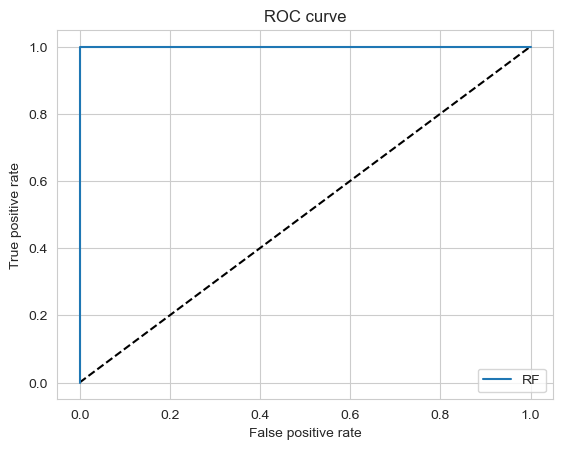

In [43]:
# Performance Metrics
y_pred_rf = rf.predict_proba(X_train)[:, 1]
y_pred = rf.predict(X_train)
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_pred_rf)
print(classification_report(y_train, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_train, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_train, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

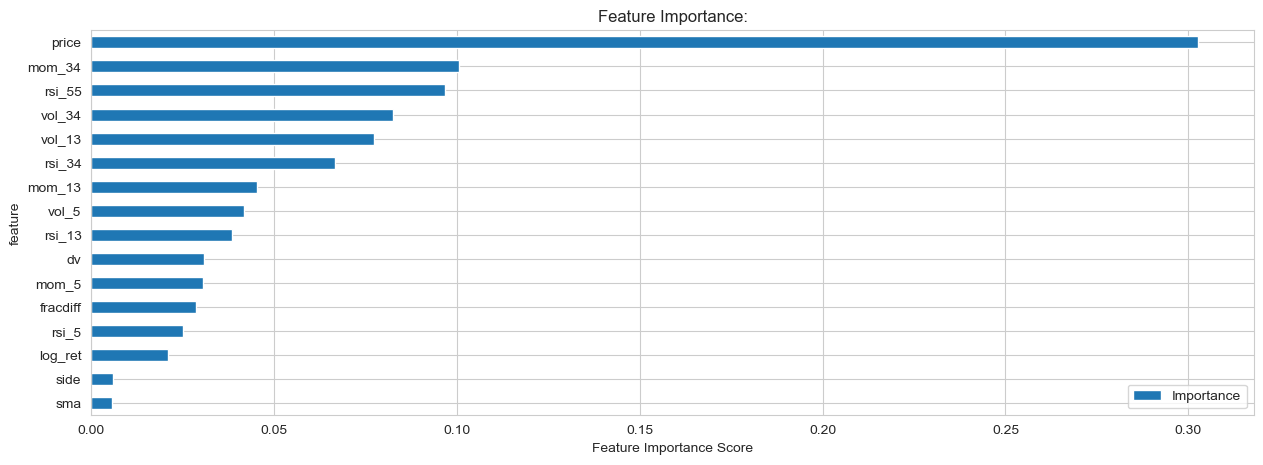

In [44]:
# Feature Importance
title = 'Feature Importance:'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()